In [1]:
# Load dữ liệu
import numpy as np
import pandas as pd
df1 = pd.read_csv('diemthi_3_1.csv')
df2 = pd.read_csv('diemthi_7_1.csv')
df3 = pd.read_csv('diemthi_7_2.csv')
df  = pd.concat([df1, df2, df3], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 76
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Họ Tên  228 non-null    object 
 1   10%     226 non-null    float64
 2   20%     226 non-null    float64
 3   20%.1   226 non-null    float64
 4   Thi     224 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


In [2]:
# Kiểm tra các giá trị null
print(df.isnull().sum())

Họ Tên    0
10%       2
20%       2
20%.1     2
Thi       4
dtype: int64


In [3]:
# Thay thế các giá trị null bằng giá trị 0
df.fillna(0, inplace = True)
# Kiểm tra các giá trị null
print(df.isnull().sum())

Họ Tên    0
10%       0
20%       0
20%.1     0
Thi       0
dtype: int64


In [4]:
df

,Họ Tên,10%,20%,20%.1,Thi
0,31_011,8.375,7.250,8.50,9.0
1,31_012,8.250,7.250,8.50,9.0
2,31_013,8.500,7.500,8.50,10.0
3,31_014,4.000,7.250,8.50,9.0
4,31_015,8.750,7.500,8.50,9.5
...,...,...,...,...,...
72,72_151,7.375,6.500,7.50,7.0
73,72_152,7.250,6.750,7.00,7.0
74,72_153,7.125,6.750,6.75,7.0
75,72_154,7.750,6.375,7.50,7.0


In [5]:
X = df.iloc[:,1:4] #3 cột điểm thành phần

In [6]:
y = df.iloc[:,[4]] #Cột điểm thi

In [7]:
from sklearn.model_selection import train_test_split
# Chia tập dữ liệu
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#### Machine Learning 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(X_train, y_train)
#Dự đoán 
y_train_pre = reg.predict(X_train)
y_test_pre = reg.predict(X_test)

#Sử dụng thang đo mean_absolute_error
ml_mae_train = mean_absolute_error(y_train, y_train_pre)
ml_mae_test = mean_absolute_error(y_test, y_test_pre)

print(f"Mean Absolute Error Train: {ml_mae_train}")
print(f"Mean Absolute Error test: {ml_mae_test}")

Mean Absolute Error Train: 0.49159846935908735
Mean Absolute Error test: 0.44800809856549884


#### Deep learning

In [9]:
X_train.shape

(182, 3)

In [10]:
#Dependencies
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# Neural network
model = Sequential()
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=["mse"])

In [11]:
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=500,
          verbose=1,
          validation_data=(X_test, y_test))
loss,mse = model.evaluate(X_test,y_test)
print(history.history.keys())

Epoch 1/500
3/3 [==============================] - 1s 146ms/step - loss: 3.9472 - mse: 19.9430 - val_loss: 3.7707 - val_mse: 16.4482
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 3.8103 - mse: 18.4651 - val_loss: 3.2175 - val_mse: 12.1933
Epoch 3/500
3/3 [==============================] - 0s 20ms/step - loss: 3.1679 - mse: 14.5963 - val_loss: 2.6543 - val_mse: 8.5243
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 3.0315 - mse: 14.0350 - val_loss: 2.0630 - val_mse: 5.4252
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 2.5933 - mse: 11.3022 - val_loss: 1.5257 - val_mse: 3.1795
Epoch 6/500
3/3 [==============================] - 0s 21ms/step - loss: 2.2474 - mse: 9.2942 - val_loss: 1.1422 - val_mse: 1.7981
Epoch 7/500
3/3 [==============================] - 0s 21ms/step - loss: 2.2492 - mse: 9.0211 - val_loss: 0.9165 - val_mse: 1.1024
Epoch 8/500
3/3 [==============================] - 0s 21ms/step - loss: 2.4467 - m

3/3 [==============================] - 0s 19ms/step - loss: 2.0339 - mse: 6.8396 - val_loss: 0.7714 - val_mse: 0.8457
Epoch 64/500
3/3 [==============================] - 0s 20ms/step - loss: 1.7326 - mse: 5.1260 - val_loss: 0.8537 - val_mse: 1.0207
Epoch 65/500
3/3 [==============================] - 0s 19ms/step - loss: 1.8949 - mse: 5.9052 - val_loss: 0.9230 - val_mse: 1.1894
Epoch 66/500
3/3 [==============================] - 0s 18ms/step - loss: 1.8245 - mse: 5.8889 - val_loss: 0.9220 - val_mse: 1.1861
Epoch 67/500
3/3 [==============================] - 0s 18ms/step - loss: 1.7647 - mse: 5.7353 - val_loss: 0.8886 - val_mse: 1.1031
Epoch 68/500
3/3 [==============================] - 0s 18ms/step - loss: 2.0234 - mse: 6.9339 - val_loss: 0.8384 - val_mse: 0.9813
Epoch 69/500
3/3 [==============================] - 0s 18ms/step - loss: 1.7664 - mse: 5.4918 - val_loss: 0.7620 - val_mse: 0.8203
Epoch 70/500
3/3 [==============================] - 0s 19ms/step - loss: 1.8071 - mse: 5.7193 - 

3/3 [==============================] - 0s 18ms/step - loss: 1.6306 - mse: 4.8323 - val_loss: 0.9686 - val_mse: 1.2676
Epoch 126/500
3/3 [==============================] - 0s 16ms/step - loss: 1.7252 - mse: 5.6679 - val_loss: 0.9774 - val_mse: 1.2889
Epoch 127/500
3/3 [==============================] - 0s 17ms/step - loss: 1.7926 - mse: 5.7165 - val_loss: 0.9583 - val_mse: 1.2409
Epoch 128/500
3/3 [==============================] - 0s 17ms/step - loss: 1.9535 - mse: 6.7733 - val_loss: 0.8946 - val_mse: 1.0869
Epoch 129/500
3/3 [==============================] - 0s 18ms/step - loss: 1.6290 - mse: 4.7746 - val_loss: 0.7967 - val_mse: 0.8649
Epoch 130/500
3/3 [==============================] - 0s 19ms/step - loss: 1.8056 - mse: 5.7457 - val_loss: 0.7158 - val_mse: 0.7063
Epoch 131/500
3/3 [==============================] - 0s 18ms/step - loss: 1.5962 - mse: 4.1551 - val_loss: 0.6652 - val_mse: 0.6174
Epoch 132/500
3/3 [==============================] - 0s 17ms/step - loss: 1.6742 - mse: 4.

3/3 [==============================] - 0s 21ms/step - loss: 1.7398 - mse: 5.6622 - val_loss: 0.9515 - val_mse: 1.1947
Epoch 188/500
3/3 [==============================] - 0s 19ms/step - loss: 1.6590 - mse: 4.8422 - val_loss: 0.9884 - val_mse: 1.2847
Epoch 189/500
3/3 [==============================] - 0s 22ms/step - loss: 1.6319 - mse: 5.2590 - val_loss: 1.0365 - val_mse: 1.4106
Epoch 190/500
3/3 [==============================] - 0s 20ms/step - loss: 1.8133 - mse: 5.6520 - val_loss: 1.0397 - val_mse: 1.4195
Epoch 191/500
3/3 [==============================] - 0s 23ms/step - loss: 1.5388 - mse: 4.1494 - val_loss: 0.9723 - val_mse: 1.2449
Epoch 192/500
3/3 [==============================] - 0s 48ms/step - loss: 1.6880 - mse: 4.9705 - val_loss: 0.8626 - val_mse: 0.9876
Epoch 193/500
3/3 [==============================] - 0s 22ms/step - loss: 1.7833 - mse: 5.6078 - val_loss: 0.7332 - val_mse: 0.7216
Epoch 194/500
3/3 [==============================] - 0s 20ms/step - loss: 1.5621 - mse: 4.

3/3 [==============================] - 0s 18ms/step - loss: 1.7032 - mse: 5.3637 - val_loss: 0.8162 - val_mse: 0.8639
Epoch 250/500
3/3 [==============================] - 0s 18ms/step - loss: 1.5351 - mse: 4.0781 - val_loss: 0.8470 - val_mse: 0.9305
Epoch 251/500
3/3 [==============================] - 0s 18ms/step - loss: 1.8283 - mse: 5.7409 - val_loss: 0.8110 - val_mse: 0.8515
Epoch 252/500
3/3 [==============================] - 0s 16ms/step - loss: 1.4405 - mse: 3.8051 - val_loss: 0.8226 - val_mse: 0.8757
Epoch 253/500
3/3 [==============================] - 0s 17ms/step - loss: 1.5500 - mse: 4.6440 - val_loss: 0.8378 - val_mse: 0.9083
Epoch 254/500
3/3 [==============================] - 0s 19ms/step - loss: 1.7103 - mse: 5.1275 - val_loss: 0.8336 - val_mse: 0.8980
Epoch 255/500
3/3 [==============================] - 0s 18ms/step - loss: 1.6610 - mse: 4.9752 - val_loss: 0.8561 - val_mse: 0.9478
Epoch 256/500
3/3 [==============================] - 0s 18ms/step - loss: 1.6650 - mse: 4.

3/3 [==============================] - 0s 20ms/step - loss: 1.4358 - mse: 3.6552 - val_loss: 0.8003 - val_mse: 0.8374
Epoch 312/500
3/3 [==============================] - 0s 20ms/step - loss: 1.5643 - mse: 4.6248 - val_loss: 0.8502 - val_mse: 0.9421
Epoch 313/500
3/3 [==============================] - 0s 20ms/step - loss: 1.5601 - mse: 4.1140 - val_loss: 0.9120 - val_mse: 1.0818
Epoch 314/500
3/3 [==============================] - 0s 18ms/step - loss: 1.6633 - mse: 4.8146 - val_loss: 0.9144 - val_mse: 1.0868
Epoch 315/500
3/3 [==============================] - 0s 19ms/step - loss: 1.5572 - mse: 4.7847 - val_loss: 0.8342 - val_mse: 0.9059
Epoch 316/500
3/3 [==============================] - 0s 21ms/step - loss: 1.6487 - mse: 4.9893 - val_loss: 0.7868 - val_mse: 0.8083
Epoch 317/500
3/3 [==============================] - 0s 18ms/step - loss: 1.4784 - mse: 3.8117 - val_loss: 0.7626 - val_mse: 0.7610
Epoch 318/500
3/3 [==============================] - 0s 20ms/step - loss: 1.7633 - mse: 4.

3/3 [==============================] - 0s 26ms/step - loss: 1.4768 - mse: 3.9258 - val_loss: 0.8579 - val_mse: 0.9462
Epoch 374/500
3/3 [==============================] - 0s 30ms/step - loss: 1.4912 - mse: 4.0498 - val_loss: 0.8976 - val_mse: 1.0366
Epoch 375/500
3/3 [==============================] - 0s 20ms/step - loss: 1.4455 - mse: 3.8786 - val_loss: 0.9364 - val_mse: 1.1231
Epoch 376/500
3/3 [==============================] - 0s 21ms/step - loss: 1.6725 - mse: 5.1736 - val_loss: 0.8597 - val_mse: 0.9481
Epoch 377/500
3/3 [==============================] - 0s 19ms/step - loss: 1.3712 - mse: 3.5105 - val_loss: 0.8052 - val_mse: 0.8354
Epoch 378/500
3/3 [==============================] - 0s 19ms/step - loss: 1.6151 - mse: 4.6572 - val_loss: 0.7534 - val_mse: 0.7381
Epoch 379/500
3/3 [==============================] - 0s 20ms/step - loss: 1.5212 - mse: 3.9959 - val_loss: 0.7152 - val_mse: 0.6649
Epoch 380/500
3/3 [==============================] - 0s 19ms/step - loss: 1.5285 - mse: 4.

3/3 [==============================] - 0s 17ms/step - loss: 1.5674 - mse: 4.1387 - val_loss: 0.7442 - val_mse: 0.7188
Epoch 436/500
3/3 [==============================] - 0s 18ms/step - loss: 1.3661 - mse: 3.3968 - val_loss: 0.7535 - val_mse: 0.7376
Epoch 437/500
3/3 [==============================] - 0s 18ms/step - loss: 1.5160 - mse: 4.0803 - val_loss: 0.7972 - val_mse: 0.8190
Epoch 438/500
3/3 [==============================] - 0s 19ms/step - loss: 1.4985 - mse: 4.1514 - val_loss: 0.8683 - val_mse: 0.9620
Epoch 439/500
3/3 [==============================] - 0s 19ms/step - loss: 1.3996 - mse: 3.5275 - val_loss: 0.9257 - val_mse: 1.0935
Epoch 440/500
3/3 [==============================] - 0s 21ms/step - loss: 1.3993 - mse: 3.6921 - val_loss: 0.9704 - val_mse: 1.1940
Epoch 441/500
3/3 [==============================] - 0s 22ms/step - loss: 1.5635 - mse: 4.3952 - val_loss: 0.9057 - val_mse: 1.0478
Epoch 442/500
3/3 [==============================] - 0s 17ms/step - loss: 1.6124 - mse: 4.

3/3 [==============================] - 0s 16ms/step - loss: 1.5737 - mse: 4.3854 - val_loss: 0.7844 - val_mse: 0.7810
Epoch 498/500
3/3 [==============================] - 0s 23ms/step - loss: 1.5171 - mse: 3.9312 - val_loss: 0.7779 - val_mse: 0.7694
Epoch 499/500
3/3 [==============================] - 0s 22ms/step - loss: 1.5279 - mse: 3.9372 - val_loss: 0.7947 - val_mse: 0.8008
Epoch 500/500
2/2 [==============================] - 0s 3ms/step - loss: 0.8655 - mse: 0.9437
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [12]:
y_train_pre = model.predict(X_train)
y_test_pre = model.predict(X_test)

dl_mae_train = mean_absolute_error(y_train, y_train_pre)
dl_mae_test = mean_absolute_error(y_test, y_test_pre)

print(f"Mean Absolute Error Train: {dl_mae_train}")
print(f"Mean Absolute Error test: {dl_mae_test}")

2/2 [==============================] - 0s 3ms/step
Mean Absolute Error Train: 0.991895100572607
Mean Absolute Error test: 0.8654633397641389


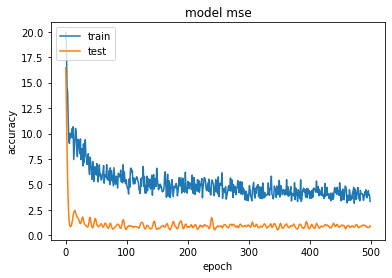

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['mse']) # giá trị accuracy của tập train
plt.plot(history.history['val_mse']) # giá trị accuracy của tập test
plt.title('model mse')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

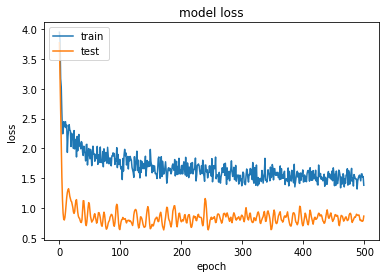

In [14]:
plt.plot(history.history['loss']) # giá trị loss của tập train
plt.plot(history.history['val_loss']) # giá trị loss của tập test
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Deploying the Model
import pickle
from flask import Flask, request, json, jsonify
import numpy as np
app = Flask(__name__)
#---the filename of the saved model---
filename = 'diemthi_3_1.csv'
#---load the saved model---
loaded_model = pickle.load(open(filename, 'rb'))
@app.route('/diemthi/v1/predict', methods=['POST'])
def predict():
    #---get the features to predict---
    features = request.json
    #---create the features list for prediction---
    features_list = [features["10%"],
    features["20%"],
    features["20%1"]]
    #---get the prediction class---
    prediction = loaded_model.predict([features_list])
    #---get the prediction probabilities---
#     confidence = loaded_model.predict_proba([features_list])
    #---formulate the response to return to client---
    response = {}
    response['prediction'] = int(prediction[0])
#     response['confidence'] = str(round(np.amax(confidence[0]) * 100 ,2))
    return jsonify(response)
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

UnpicklingError: invalid load key, 'H'.